# Imports


In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats

# Data pre-processing

In [2]:
genes = pd.read_csv('http://139.91.190.186/tei/bioinformatics/assignment.txt', sep='\t').iloc[:, 1:]


<AxesSubplot:>

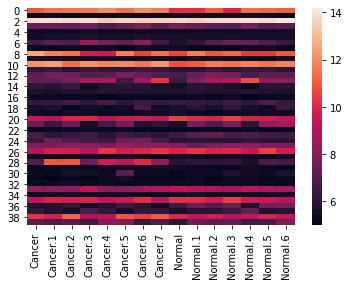

In [3]:
sns.heatmap(genes.iloc[:40])

# Data analysis

## Gene expression analysis using means

In [4]:
genes['Cancer.Mean'] = genes.filter(like='Cancer').mean(axis=1)

In [5]:
genes['Normal.Mean'] = genes.filter(like='Normal').mean(axis=1)

In [6]:
genes['Means.Delta'] = genes['Cancer.Mean'] - genes['Normal.Mean']

In [7]:
means_delta_sorted_genes = genes.sort_values(by='Means.Delta')

In [8]:
sliced_means_delta_sorted_genes = means_delta_sorted_genes.head(20).append(means_delta_sorted_genes.tail(20))

<AxesSubplot:>

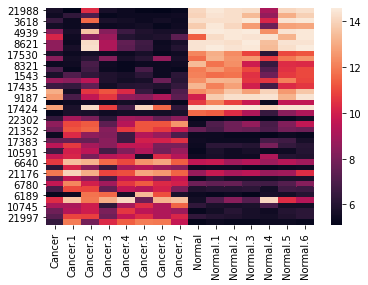

In [9]:
sns.heatmap(sliced_means_delta_sorted_genes.iloc[:, :-3])

## Gene expression analysis using p-value

In [10]:
cancer_columns_w_mean = genes.filter(like='Cancer')
cancer_columns_wo_mean = cancer_columns_w_mean.drop(columns=cancer_columns_w_mean.filter(like='Mean').columns)
normal_columns_w_mean = genes.filter(like='Normal')
normal_columns_wo_mean = genes[[column for column in normal_columns_w_mean if 'Mean' not in column]]

In [11]:
cancer_columns_wo_mean

,Cancer,Cancer.1,Cancer.2,Cancer.3,Cancer.4,Cancer.5,Cancer.6,Cancer.7
0,11.0,11.4,11.5,11.6,12.0,11.4,12.0,11.7
1,5.2,5.3,5.2,5.3,5.3,5.4,5.3,5.3
2,13.9,13.9,13.8,13.9,13.4,13.7,13.6,13.6
3,7.5,7.4,7.3,7.6,6.8,7.3,7.9,7.2
4,5.4,5.3,5.4,5.5,5.3,5.3,5.3,5.3
...,...,...,...,...,...,...,...,...
22640,7.2,7.2,6.9,6.0,6.9,7.1,6.6,6.1
22641,5.9,5.8,5.6,6.1,5.8,5.8,5.9,5.9
22642,9.0,7.6,9.5,6.7,8.9,9.8,7.8,8.7
22643,5.4,5.3,5.4,5.5,5.5,5.6,5.5,5.5


In [12]:
normal_columns_wo_mean

,Normal,Normal.1,Normal.2,Normal.3,Normal.4,Normal.5,Normal.6
0,10.2,10.2,11.0,9.9,11.4,11.2,11.1
1,5.5,5.4,5.3,5.5,5.4,5.4,5.2
2,13.7,13.6,13.8,13.8,14.0,13.8,14.2
3,7.7,7.5,7.2,7.1,7.7,6.9,7.1
4,5.3,5.4,5.4,5.3,5.4,5.4,5.4
...,...,...,...,...,...,...,...
22640,8.1,7.6,7.6,6.5,6.1,6.9,7.8
22641,5.5,5.6,5.8,5.8,6.1,5.6,5.7
22642,8.2,9.2,9.1,9.6,7.6,9.1,9.6
22643,5.3,5.3,5.5,5.2,5.3,5.4,5.3


## Gene expression analysis using Bonferroni corrected p-value

## Gene expression analysis using q-value

# Data validation